In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

add= '/content/drive/MyDrive/PROJECT/Pcam'
import os
os.listdir(add)



['camelyonpatch_level_2_split_test_meta (2).csv',
 'camelyonpatch_level_2_split_valid_y.h5',
 'camelyonpatch_level_2_split_test_y.h5',
 'camelyonpatch_level_2_split_test_meta (1).csv',
 'camelyonpatch_level_2_split_train_y.h5',
 'camelyonpatch_level_2_split_train_meta (1).csv',
 'camelyonpatch_level_2_split_train_mask.h5',
 'camelyonpatch_level_2_split_test_x.h5',
 'camelyonpatch_level_2_split_valid_meta (1).csv',
 'camelyonpatch_level_2_split_train_x.h5',
 'camelyonpatch_level_2_split_valid_x.h5']

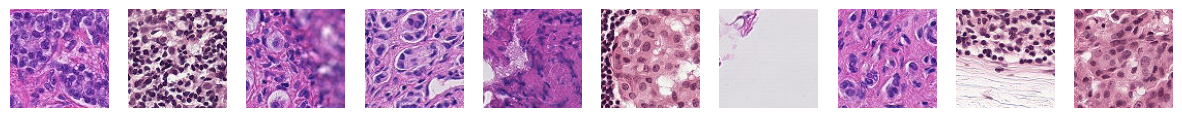

In [ ]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

def display_images_from_h5(file_path, dataset_name='x', num_images=100):

    with h5py.File(file_path, 'r') as h5_file:

        images = h5_file[dataset_name]


        num_images = min(num_images, len(images))


        fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

        for i in range(num_images):

            image = images[i]


            if image.shape[2] == 3:
                axes[i].imshow(image)
            else:
                axes[i].imshow(image, cmap='gray')

            axes[i].axis('off')

        plt.show()


file_path = '/content/drive/MyDrive/PROJECT/pcamv1 (1)/camelyonpatch_level_2_split_valid_x.h5'
display_images_from_h5(file_path, dataset_name='x', num_images=10)


In [ ]:
test_meta= '/content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_test_meta (1).csv'
train_meta = '/content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_train_meta (1).csv'
valid_meta= '/content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_valid_meta (1).csv'


train_x = '/content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_train_x.h5'
test_x= '/content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_test_x.h5'
valid_x =  '/content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_valid_x.h5'


train_y = '/content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_train_y.h5'
test_y = '/content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_test_y.h5'
valid_y = '/content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_valid_y.h5'


In [ ]:
import h5py

def inspect_h5_file(file_path):
    with h5py.File(file_path, 'r') as f:
        print(f"Contents of the HDF5 file {file_path}:")
        for key in f.keys():
            print(f"{key}: {f[key].shape}")

inspect_h5_file(train_x)
inspect_h5_file(valid_x)
inspect_h5_file(test_x)
inspect_h5_file(train_y)
inspect_h5_file(valid_y)
inspect_h5_file(test_y)


Contents of the HDF5 file /content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_train_x.h5:
x: (262144, 96, 96, 3)
Contents of the HDF5 file /content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_valid_x.h5:
x: (32768, 96, 96, 3)
Contents of the HDF5 file /content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_test_x.h5:
x: (32768, 96, 96, 3)
Contents of the HDF5 file /content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_train_y.h5:
y: (262144, 1, 1, 1)
Contents of the HDF5 file /content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_valid_y.h5:
y: (32768, 1, 1, 1)
Contents of the HDF5 file /content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_test_y.h5:
y: (32768, 1, 1, 1)


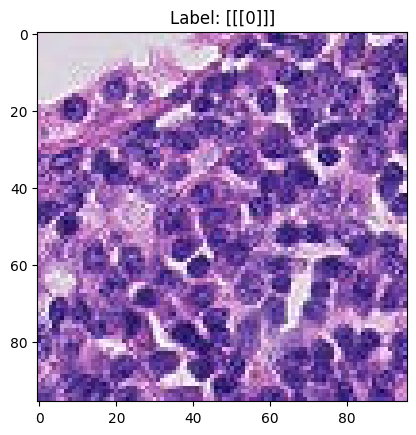

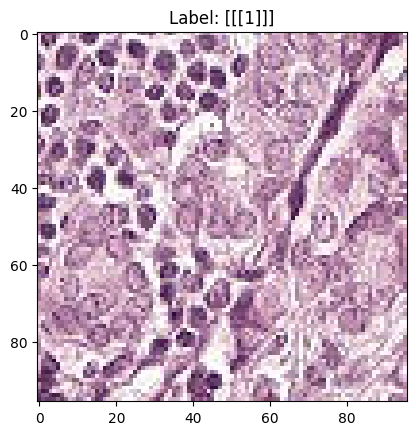

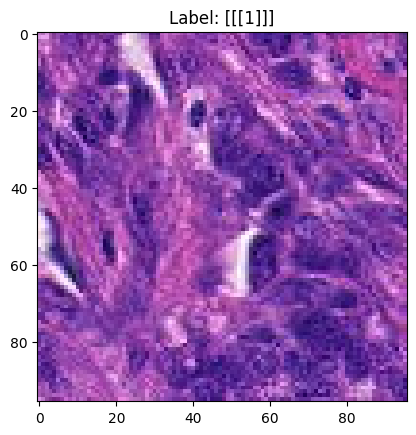

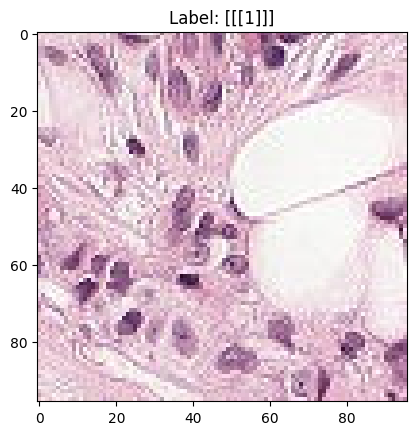

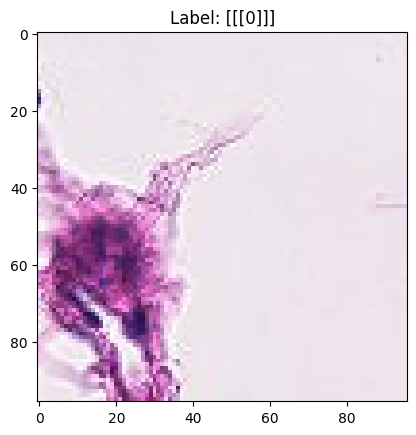

In [ ]:
import matplotlib.pyplot as plt

def display_images(h5_file_x, h5_file_y, num_images=5):
    with h5py.File(h5_file_x, 'r') as fx, h5py.File(h5_file_y, 'r') as fy:
        images = fx['x'][:num_images]
        labels = fy['y'][:num_images]

    for i in range(num_images):
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.show()


display_images(train_x, train_y)


In [ ]:
import h5py
import numpy as np


train_x = '/content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_train_x.h5'
valid_x = '/content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_valid_x.h5'
test_x = '/content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_test_x.h5'

train_y = '/content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_train_y.h5'
valid_y = '/content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_valid_y.h5'
test_y = '/content/drive/MyDrive/PROJECT/Pcam/camelyonpatch_level_2_split_test_y.h5'

def calculate_statistics(h5_file):
    with h5py.File(h5_file, 'r') as f:
        images = f['x'][:]

    mean = np.mean(images)
    std = np.std(images)
    min_val = np.min(images)
    max_val = np.max(images)

    print(f"Mean: {mean}, Std: {std}, Min: {min_val}, Max: {max_val}")


calculate_statistics(train_x)
calculate_statistics(valid_x)
calculate_statistics(test_x)


Mean: 164.1124207522306, Std: 64.8695376012004, Min: 0, Max: 255
Mean: 163.2235769894388, Std: 65.18540637900747, Min: 0, Max: 255
Mean: 160.93525931459885, Std: 65.9527719469713, Min: 0, Max: 255


In [ ]:
import torch
from torch.utils.data import Dataset

class PCamDataset(Dataset):
    def __init__(self, h5_file_x, h5_file_y, transform=None):
        self.file_x = h5_file_x
        self.file_y = h5_file_y
        self.transform = transform
        with h5py.File(h5_file_x, 'r') as fx:
            self.data_len = len(fx['x'])

    def __len__(self):
        return self.data_len

    def __getitem__(self, idx):
        with h5py.File(self.file_x, 'r') as fx, h5py.File(self.file_y, 'r') as fy:
            x = fx['x'][idx]
            y = fy['y'][idx]
        if self.transform:
            x = self.transform(x)
        return x, y


In [ ]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = PCamDataset(train_x, train_y, transform=transform)
val_dataset = PCamDataset(valid_x, valid_y, transform=transform)
test_dataset = PCamDataset(test_x, test_y, transform=transform)

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
import torch.nn as nn
import torch.optim as optim

class PCamCNN(nn.Module):
    def __init__(self):
        super(PCamCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 12 * 12, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PCamCNN().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device).float()

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device).float()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            val_loss += loss.item()
            predicted = (outputs.squeeze() > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}, Val Loss: {val_loss/len(val_loader)}, Val Accuracy: {100 * correct / total}%')

torch.save(model.state_dict(), 'pcam_model.pth')


model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device).float()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        test_loss += loss.item()
        predicted = (outputs.squeeze() > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Loss: {test_loss/len(test_loader)}')
print(f'Test Accuracy: {100 * correct / total}%')


AUTOENCODERS  applied on  BLood smear cell

In [ ]:

from torch.utils.data import DataLoader


batch_size = 64

data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

data_loader.dataset.transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


In [ ]:

import torch
import torch.nn as nn
from torch.utils.data import DataLoader


class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
          #encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),  # 64x64x3 -> 32x32x16
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),  # 32x32x16 -> 16x16x32
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),  # 16x16x32 -> 8x8x64
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),  # 8x8x64 -> 16x16x32
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1),  # 16x16x32 -> 32x32x16
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=4, stride=2, padding=1),  # 32x32x16 -> 64x64x3
            nn.Sigmoid()  # output values are in the range [0, 1]
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


model = Autoencoder()


criterion = nn.MSELoss()


optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 30

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch in data_loader:

        outputs = model(batch)


        loss = criterion(outputs, batch)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        epoch_loss += loss.item()

    epoch_loss /= len(data_loader)


    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

torch.save(model.state_dict(), 'autoencoder_model.pth')


Epoch [1/30], Loss: 0.0738
Epoch [2/30], Loss: 0.0375
Epoch [3/30], Loss: 0.0341
Epoch [4/30], Loss: 0.0324
Epoch [5/30], Loss: 0.0312
Epoch [6/30], Loss: 0.0306
Epoch [7/30], Loss: 0.0300
Epoch [8/30], Loss: 0.0295
Epoch [9/30], Loss: 0.0291
Epoch [10/30], Loss: 0.0288
Epoch [11/30], Loss: 0.0287
Epoch [12/30], Loss: 0.0283
Epoch [13/30], Loss: 0.0282
Epoch [14/30], Loss: 0.0280
Epoch [15/30], Loss: 0.0279
Epoch [16/30], Loss: 0.0278
Epoch [17/30], Loss: 0.0278
Epoch [18/30], Loss: 0.0275
Epoch [19/30], Loss: 0.0275
Epoch [20/30], Loss: 0.0274
Epoch [21/30], Loss: 0.0273
Epoch [22/30], Loss: 0.0272
Epoch [23/30], Loss: 0.0271
Epoch [24/30], Loss: 0.0270
Epoch [25/30], Loss: 0.0269
Epoch [26/30], Loss: 0.0268
Epoch [27/30], Loss: 0.0267
Epoch [28/30], Loss: 0.0267
Epoch [29/30], Loss: 0.0266
Epoch [30/30], Loss: 0.0267
